Caricamento dati CGM per paziente...
Caricato subject1 con 462400 letture CGM.
Caricato subject2 con 467275 letture CGM.
Caricato subject3 con 398570 letture CGM.
Caricato subject4 con 475558 letture CGM.
Caricato subject5 con 380204 letture CGM.
Caricato subject10 con 323261 letture CGM.
Caricato subject11 con 297246 letture CGM.
Caricato subject12 con 315823 letture CGM.
Caricato subject13 con 257503 letture CGM.
Caricato subject14 con 217149 letture CGM.
Caricato subject15 con 213468 letture CGM.
Caricato subject16 con 211230 letture CGM.
Caricato subject17 con 196223 letture CGM.
Caricato subject18 con 169467 letture CGM.
Caricato subject19 con 167157 letture CGM.
Caricato subject20 con 151200 letture CGM.
Caricato subject21 con 135952 letture CGM.
Caricato subject22 con 113768 letture CGM.
Caricato subject23 con 102998 letture CGM.
Caricato subject24 con 80181 letture CGM.
Caricato subject25 con 115481 letture CGM.
Caricato subject26 con 73230 letture CGM.
Caricato subject27 con 6

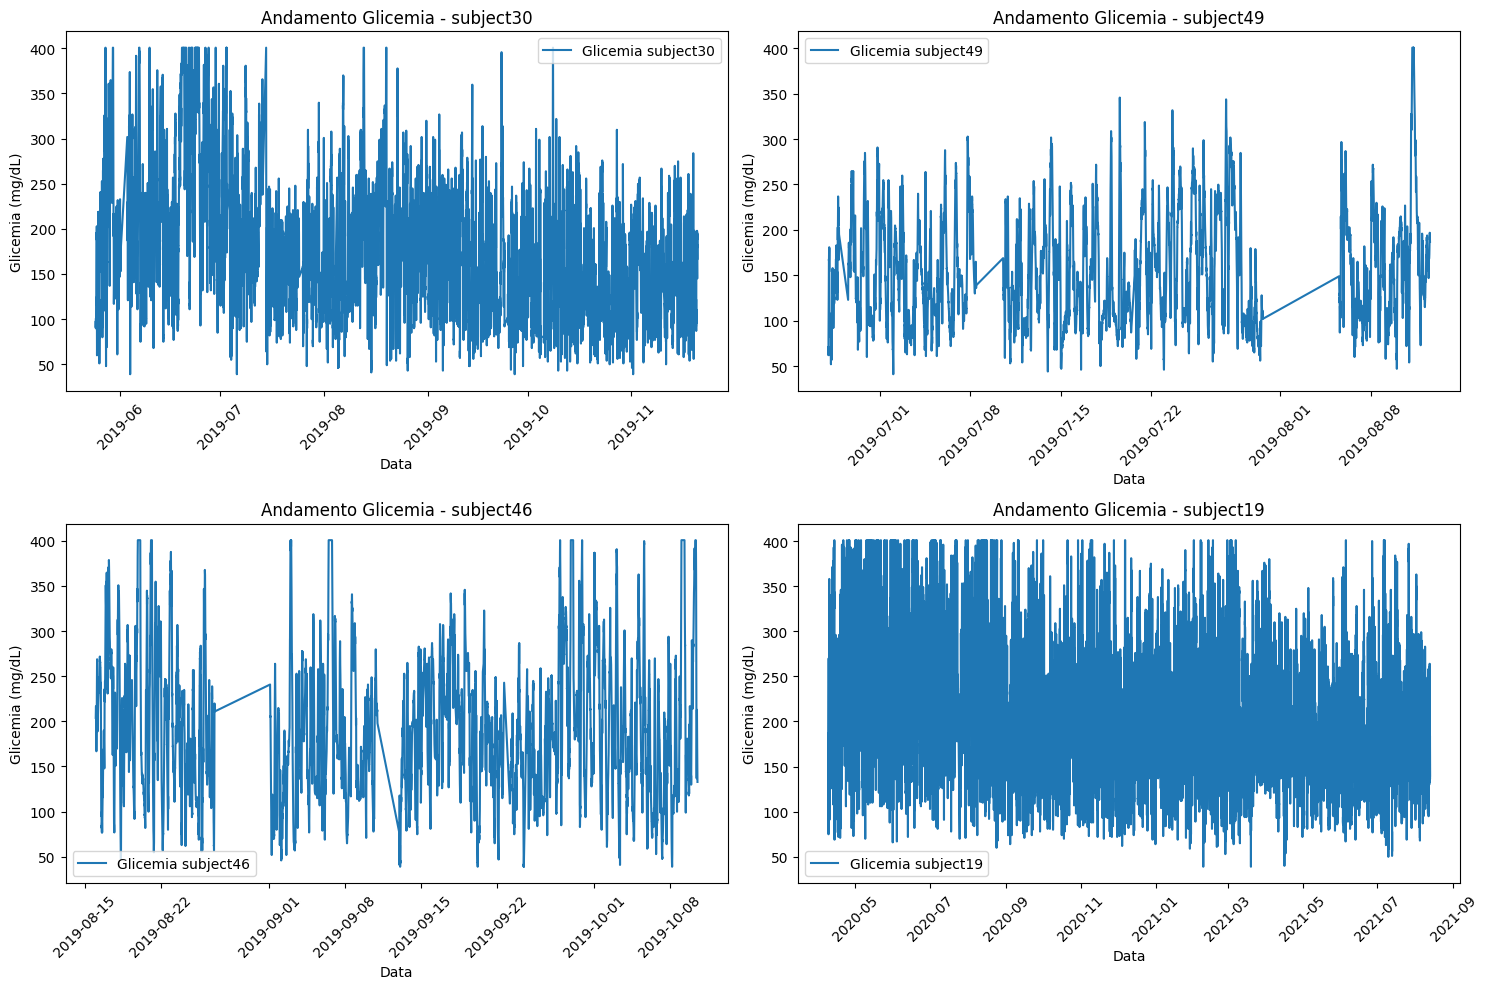


Distribuzione dei valori CGM...


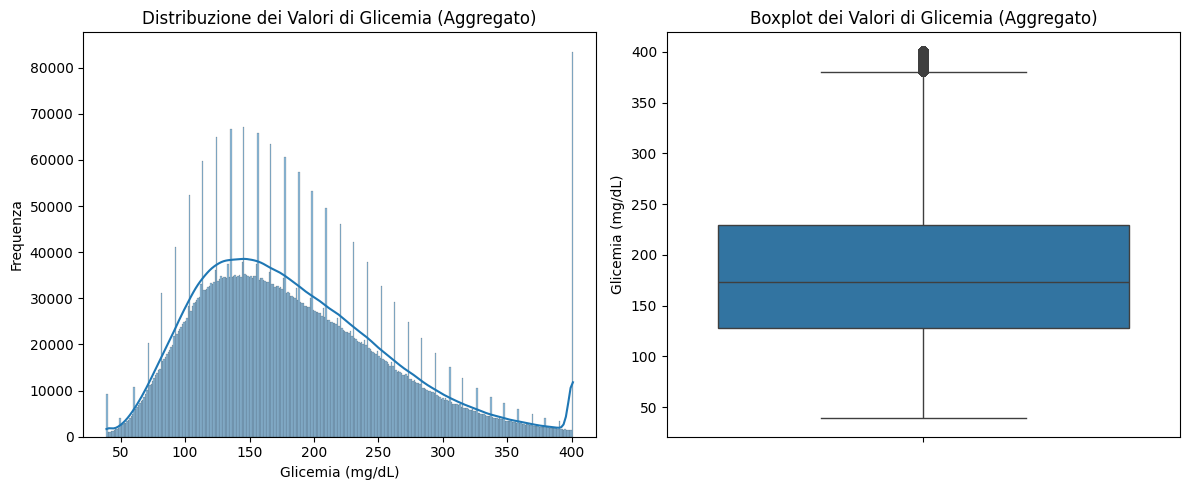

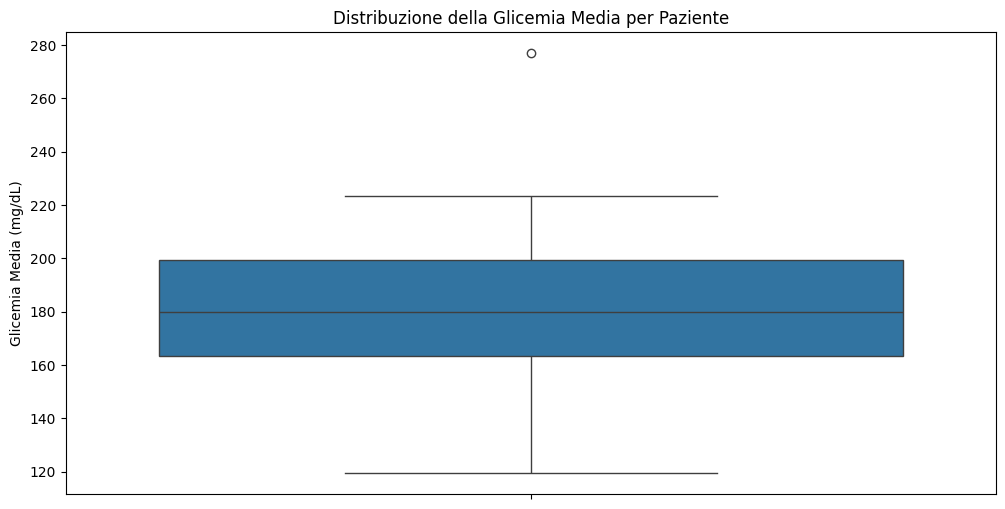


Analisi frequenza di campionamento (esempio per il primo paziente valido):
Statistiche sulle differenze temporali (minuti) per subject1:
count    462399.000000
mean          6.786208
std         109.175587
min           0.000000
25%           4.990483
50%           5.000000
75%           5.000000
max       35177.600000
Name: date, dtype: float64


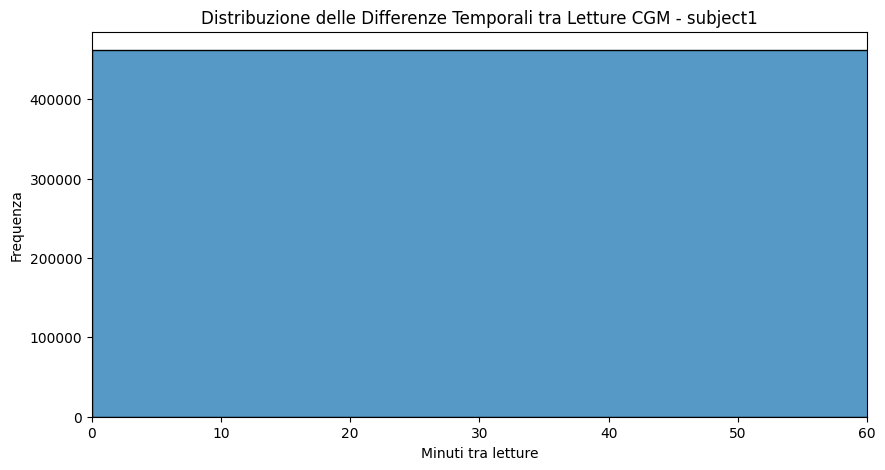

Numero di gap > 15 minuti per subject1: 2182 su 462399 intervalli.

Calcolo Time in Ranges per paziente...
Time in Ranges (esempio primi 5 pazienti):
   tir_percent  tbr_total_percent  tar_total_percent  time_very_low_percent  \
0    54.112673           2.560554          43.326773               0.573097   
1    51.407843           1.185169          47.406987               0.175914   
2    45.563389           2.218933          52.217678               0.609429   
3    69.881487           5.956792          24.161722               1.908074   
4    46.982672           1.421342          51.595985               0.198841   

   time_low_sev_percent  time_very_high_percent  time_high_sev_percent  \
0              1.987457               15.263625              28.063149   
1              1.009256               18.124659              29.282328   
2              1.609504               20.975236              31.242442   
3              4.048718                4.272875              19.888846   
4    

C:\Users\rosar\AppData\Local\Temp\ipykernel_6484\2121608828.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tir_categories = df_tir_melted_for_plot.groupby('RangeCategory')['Percentage'].mean().reindex(category_order)


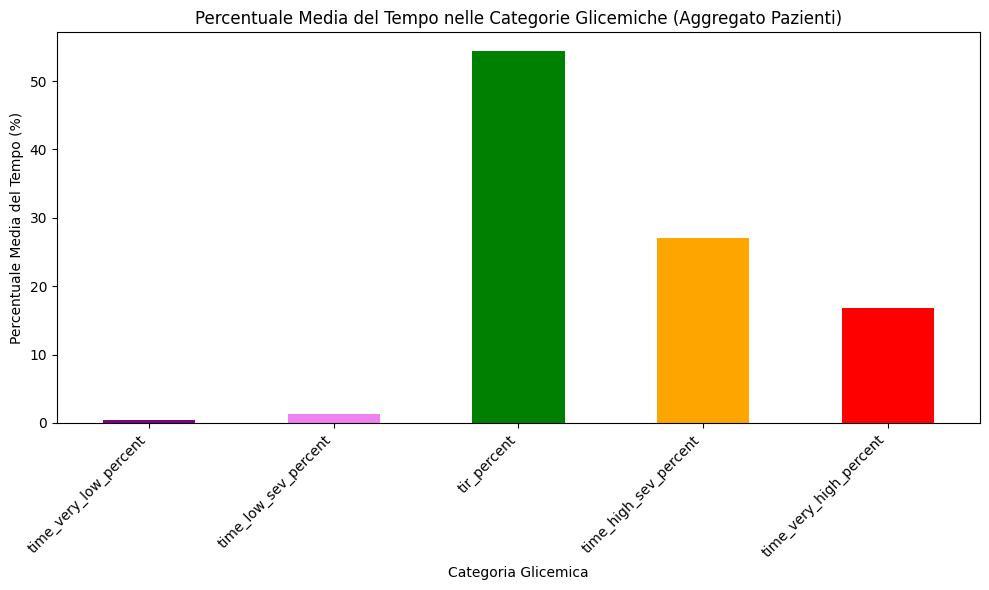

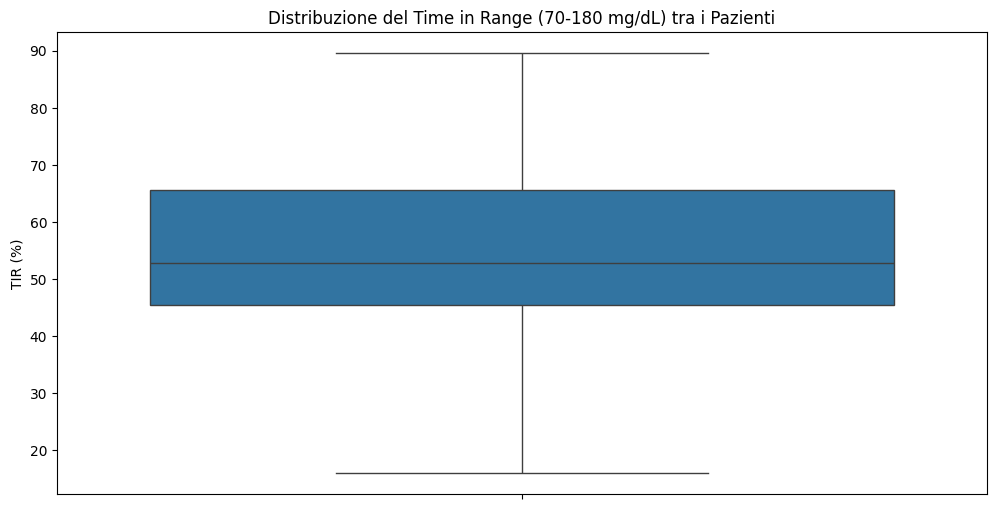


--- EDA: Feature Statiche Paziente ---
                Age  Gender             Race  Hemoglobin A1C
count            54      54               54            54.0
unique           16       2                6            29.0
top     55 - 64 yrs  Female  White/Caucasian             7.6
freq              8      37               48             5.0


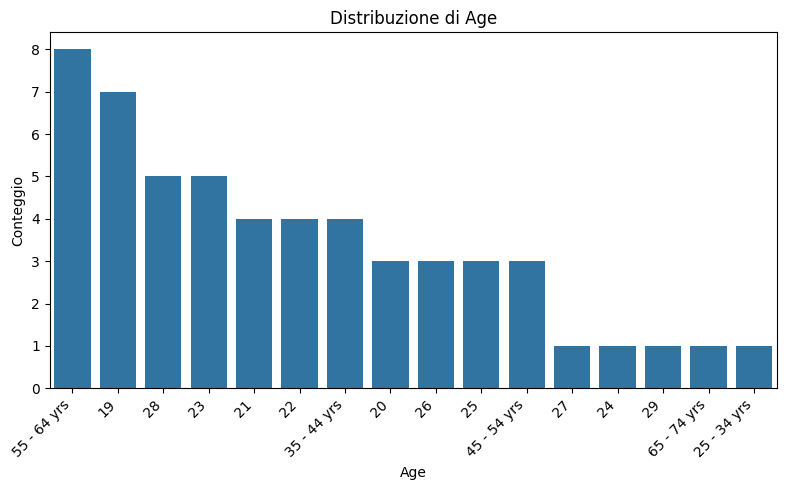

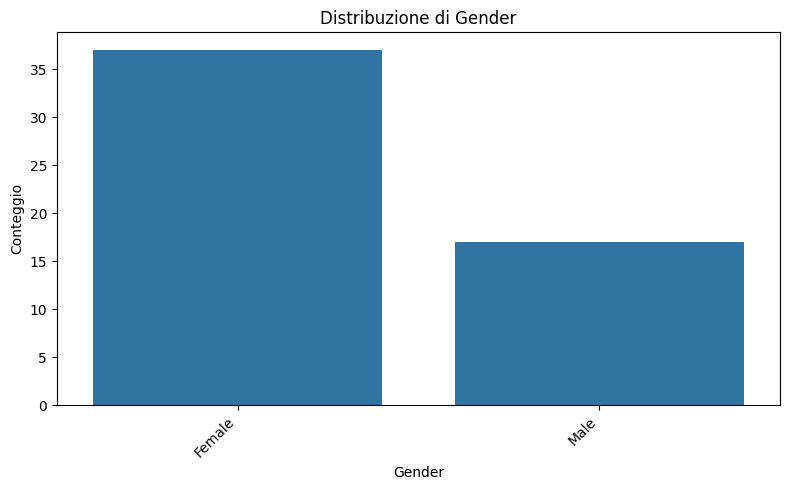

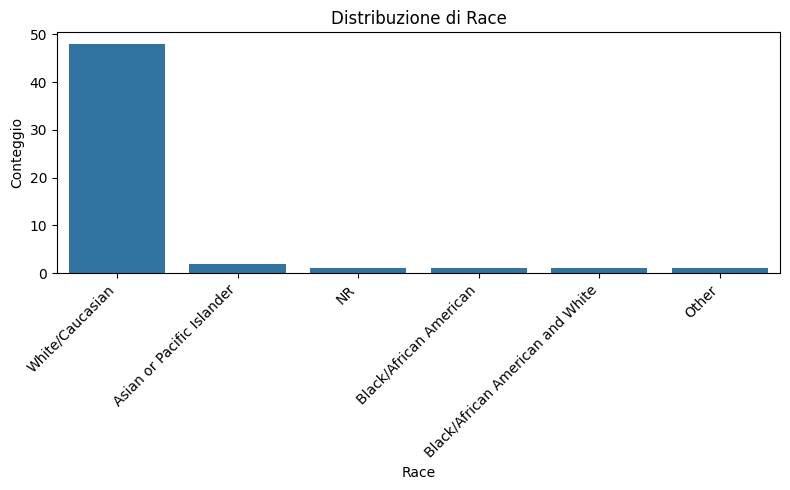

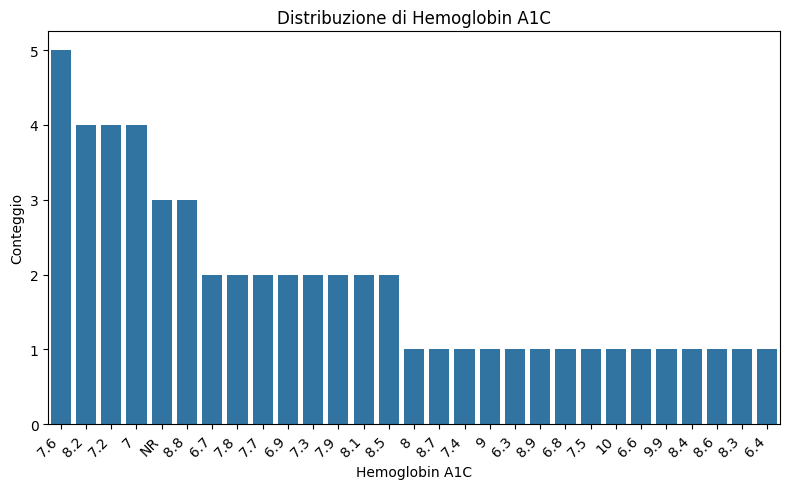


--- EDA: Relazioni tra CGM e Feature Statiche ---


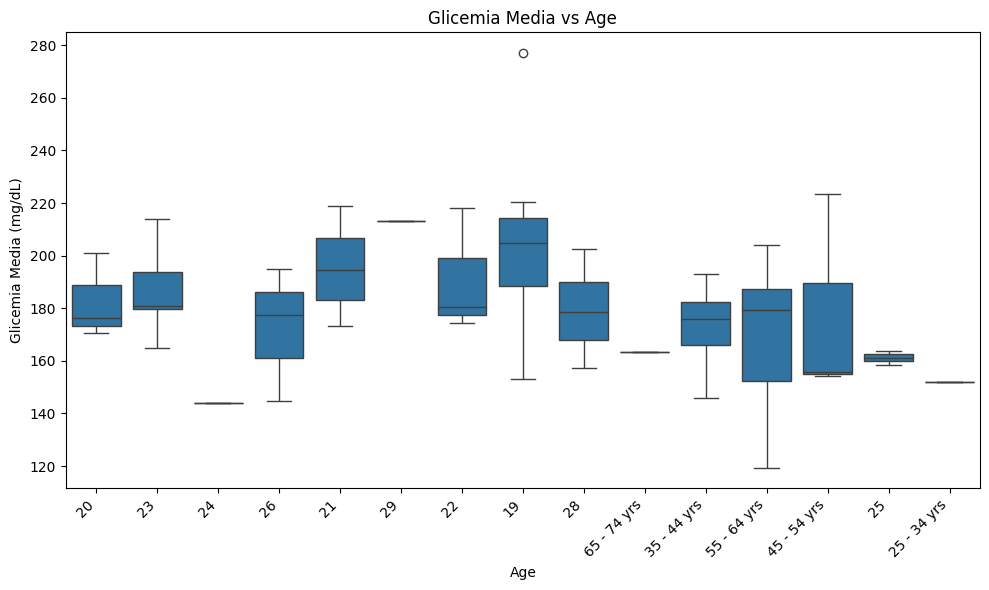

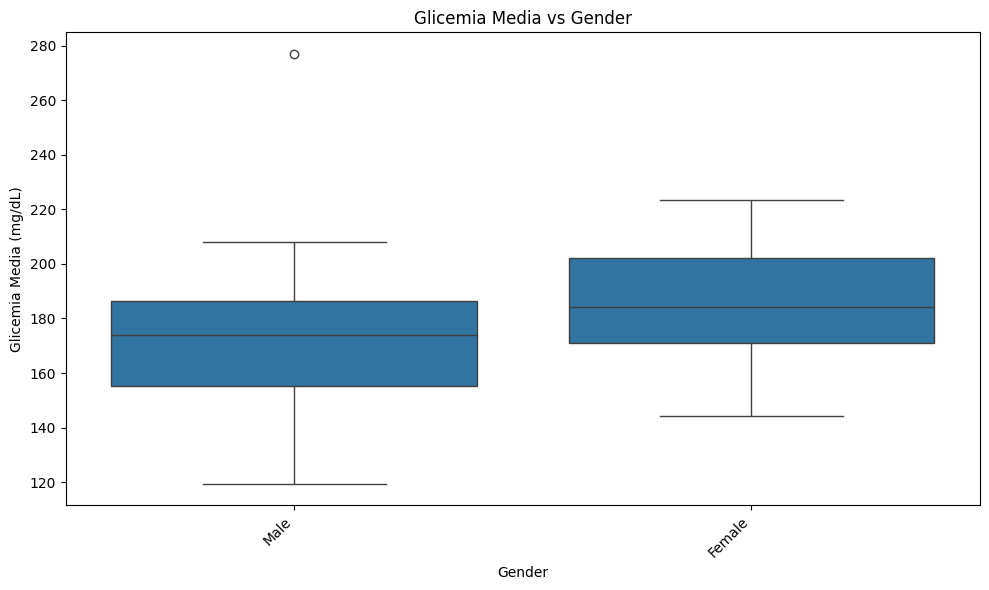

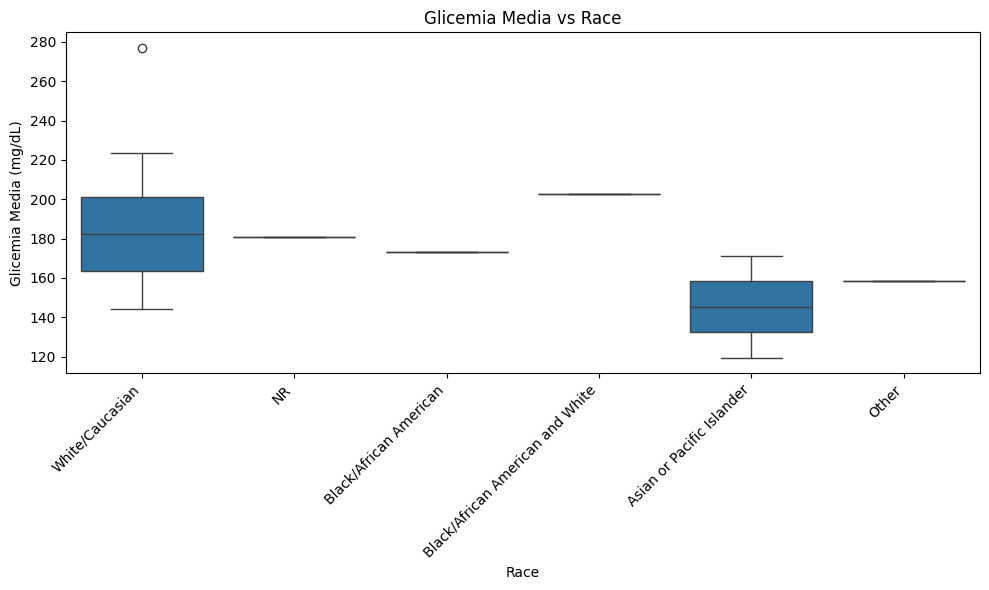

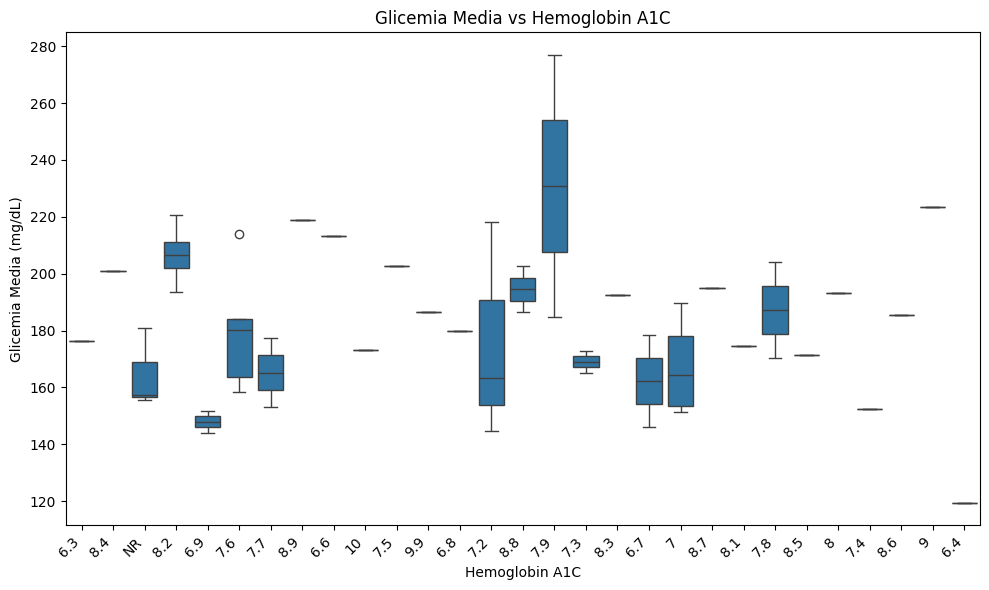


--- Preprocessing Base Dati CGM ---

Sommario dei dati di glucosio mancanti per paziente:
           missing   total  percentage
subject1         0  462400         0.0
subject42        0   22210         0.0
subject32        0   37424         0.0
subject33        0   53643         0.0
subject34        0   32131         0.0
subject35        0   31023         0.0
subject36        0   27369         0.0
subject37        0   28398         0.0
subject38        0   27729         0.0
subject39        0   26120         0.0

--- Preprocessing Base Feature Statiche ---

Tipi di dato delle feature statiche:
SubjectID_num      int64
Age               object
Gender            object
Race              object
Hemoglobin A1C    object
SubjectID         object
dtype: object

Valori mancanti nelle feature statiche (per colonna):
SubjectID_num     0
Age               0
Gender            0
Race              0
Hemoglobin A1C    0
SubjectID         0
dtype: int64

--- Fine Fase 1: Acquisizione e Preprocessin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fase 1.1: Caricamento Dati ---

# Percorso alla cartella del dataset (da adattare se necessario)
DATASET_PATH = 'dataset/' # Assicurati che questa sia la cartella contenente i file

# Carico i dati CGM dei pazienti in un dizionario
# La chiave sarà 'subjectX' e il valore sarà un DataFrame con 'date' e 'glucose'
cgm_data_patients = {}
subject_ids_to_load = [i for i in range(1, 55) if i not in [6, 7, 8, 9]] # Soggetti da escludere come da codice originale

print("Caricamento dati CGM per paziente...")
for i in subject_ids_to_load:
    subject_id_str = f"subject{i}"
    file_path = f"{DATASET_PATH}Subject{i}.xlsx"
    try:
        # Leggiamo solo i fogli che contengono i dati CGM, assumendo si chiami 'CGM' o il primo foglio
        # Dalla descrizione del paper, ogni file ha un foglio CGM
        xls = pd.ExcelFile(file_path)
        if 'CGM' in xls.sheet_names:
            df_cgm_patient = pd.read_excel(xls, sheet_name='CGM')
        else:
            # Se non c'è un foglio chiamato 'CGM', prendiamo il primo come fallback
            # (potrebbe essere necessario adattare in base alla struttura reale dei file)
            print(f"Attenzione: Foglio 'CGM' non trovato per {subject_id_str}. Caricamento del primo foglio.")
            df_cgm_patient = pd.read_excel(xls, sheet_name=0)

        # Rinominiamo le colonne per coerenza se necessario
        # Assumiamo che le colonne siano 'date' e 'mg/dl' come nel tuo codice
        # Se il paper specifica nomi diversi (es. 'mg/dL'), adattiamo qui
        if 'mg/dl' in df_cgm_patient.columns and 'mg/dL' not in df_cgm_patient.columns:
            df_cgm_patient.rename(columns={'mg/dl': 'glucose'}, inplace=True) # Usiamo 'glucose' per generalità
        elif 'mg/dL' in df_cgm_patient.columns:
            df_cgm_patient.rename(columns={'mg/dL': 'glucose'}, inplace=True)
        else:
            print(f"Attenzione: Colonna mg/dl o mg/dL non trovata per {subject_id_str}. Controllare il file.")
            # Potrebbe essere necessario gestire questo caso o escludere il paziente

        if 'date' not in df_cgm_patient.columns:
            print(f"Attenzione: Colonna 'date' non trovata per {subject_id_str}. Controllare il file.")
            # Potrebbe essere necessario gestire questo caso

        # Convertiamo subito la colonna 'date' in datetime
        if 'date' in df_cgm_patient.columns:
            df_cgm_patient['date'] = pd.to_datetime(df_cgm_patient['date'])
            df_cgm_patient.sort_values(by='date', inplace=True) # Ordiniamo per data

        cgm_data_patients[subject_id_str] = df_cgm_patient
        print(f"Caricato {subject_id_str} con {len(df_cgm_patient)} letture CGM.")

    except FileNotFoundError:
        print(f"Errore: File non trovato per {subject_id_str} in {file_path}")
    except Exception as e:
        print(f"Errore durante il caricamento di {subject_id_str}: {e}")

print(f"\nCaricati dati CGM per {len(cgm_data_patients)} pazienti.")

# Carico le informazioni demografiche dei pazienti
# Assumiamo che il file 'SubjectDemographics_3-15-23.xlsx' abbia una colonna 'SubjectID' (es. subject1, subject2, ...)
# e le altre colonne siano Age, Gender, Race, Hemoglobin A1C
demographics_file = f"{DATASET_PATH}SubjectDemographics_3-15-23.xlsx" # Nome file come nel tuo codice
try:
    df_demographics = pd.read_excel(demographics_file)
    # Potrebbe essere necessario standardizzare i nomi delle colonne e l'ID del soggetto
    # Esempio: se l'ID nel file demografico è solo il numero (es. 1, 2, ...)
    if 'SubjectID' not in df_demographics.columns and 'Subject' in df_demographics.columns:
         df_demographics.rename(columns={'Subject': 'SubjectID_num'}, inplace=True) # Adattare se il nome è diverso
         df_demographics['SubjectID'] = 'subject' + df_demographics['SubjectID_num'].astype(str)
    elif 'SubjectID' in df_demographics.columns:
         # Assicuriamoci che sia nel formato 'subjectX' se non lo è già
        if not df_demographics['SubjectID'].astype(str).str.startswith('subject').all():
             df_demographics['SubjectID'] = 'subject' + df_demographics['SubjectID'].astype(str)

    print("\nInformazioni demografiche caricate:")
    print(df_demographics.head())
    print(f"Forma del DataFrame demografico: {df_demographics.shape}")
except FileNotFoundError:
    print(f"Errore: File demografico non trovato in {demographics_file}")
    df_demographics = pd.DataFrame() # Creiamo un DataFrame vuoto per evitare errori successivi
except Exception as e:
    print(f"Errore durante il caricamento del file demografico: {e}")
    df_demographics = pd.DataFrame()

# --- Fase 1.2: Unione e Strutturazione Dati ---
# Creiamo una lista di DataFrame, dove ogni DataFrame contiene i dati CGM
# e le feature statiche per quel paziente.

all_patients_data = []
print("\nUnione dati CGM e demografici per paziente...")
for subject_id_str, df_cgm in cgm_data_patients.items():
    patient_df = df_cgm.copy()
    patient_df['SubjectID'] = subject_id_str # Aggiungiamo l'ID del soggetto ai dati CGM

    if not df_demographics.empty and 'SubjectID' in df_demographics.columns:
        # Recupera le informazioni demografiche per questo soggetto
        demographics_info = df_demographics[df_demographics['SubjectID'] == subject_id_str]

        if not demographics_info.empty:
            # Aggiungi ogni colonna demografica come nuova colonna nel DataFrame del paziente
            # (queste saranno costanti per tutte le righe di questo paziente)
            for col in demographics_info.columns:
                if col != 'SubjectID': # Evitiamo di duplicare SubjectID
                    patient_df[col] = demographics_info[col].iloc[0]
        else:
            print(f"Attenzione: Informazioni demografiche non trovate per {subject_id_str}")
    else:
        print(f"Attenzione: DataFrame demografico vuoto o senza colonna 'SubjectID'. Impossibile unire.")

    all_patients_data.append(patient_df)

if all_patients_data:
    # Possiamo anche concatenare tutto in un unico grande DataFrame se preferibile per alcune analisi aggregate
    # ma per ora manteniamo una lista, che è utile per analisi per-paziente.
    df_full_dataset = pd.concat(all_patients_data, ignore_index=True)
    print(f"\nDataset completo (prime righe):\n{df_full_dataset.head()}")
    print(f"Forma del dataset completo: {df_full_dataset.shape}")
else:
    print("Nessun dato paziente elaborato.")
    df_full_dataset = pd.DataFrame() # Per evitare errori successivi

# --- Fase 1.3: Analisi Descrittiva Preliminare (EDA) ---

if not df_full_dataset.empty:
    print("\n--- Inizio Analisi Descrittiva Preliminare (EDA) ---")

    # EDA: Dati CGM
    print("\nStatistiche descrittive generali sulla glicemia (aggregato):")
    print(df_full_dataset['glucose'].describe())

    # Statistiche descrittive per paziente
    print("\nStatistiche glicemia per paziente (esempio primi 5):")
    cgm_stats_per_patient = df_full_dataset.groupby('SubjectID')['glucose'].agg(['min', 'max', 'mean', 'std', 'count', 'median'])
    print(cgm_stats_per_patient.head())
    # Potresti voler salvare cgm_stats_per_patient in un file CSV
    # cgm_stats_per_patient.to_csv('cgm_summary_stats_per_patient.csv')

    # Visualizzazione delle serie storiche CGM per alcuni pazienti campione
    print("\nVisualizzazione serie storiche CGM per pazienti campione...")
    plt.figure(figsize=(15, 10))
    patient_samples = np.random.choice(df_full_dataset['SubjectID'].unique(), size=min(4, len(df_full_dataset['SubjectID'].unique())), replace=False)
    for i, subject_id_sample in enumerate(patient_samples):
        plt.subplot(2, 2, i+1)
        patient_data_sample = df_full_dataset[df_full_dataset['SubjectID'] == subject_id_sample]
        plt.plot(patient_data_sample['date'], patient_data_sample['glucose'], label=f'Glicemia {subject_id_sample}')
        plt.title(f'Andamento Glicemia - {subject_id_sample}')
        plt.xlabel('Data')
        plt.ylabel('Glicemia (mg/dL)')
        plt.xticks(rotation=45)
        plt.legend()
    plt.tight_layout()
    plt.show()

    # Distribuzione dei valori CGM (istogramma e boxplot aggregati)
    print("\nDistribuzione dei valori CGM...")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_full_dataset, x='glucose', kde=True)
    plt.title('Distribuzione dei Valori di Glicemia (Aggregato)')
    plt.xlabel('Glicemia (mg/dL)')
    plt.ylabel('Frequenza')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_full_dataset['glucose'].dropna())
    plt.title('Boxplot dei Valori di Glicemia (Aggregato)')
    plt.ylabel('Glicemia (mg/dL)')
    plt.tight_layout()
    plt.show()

    # Boxplot della glicemia media per paziente
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=cgm_stats_per_patient, y='mean')
    plt.title('Distribuzione della Glicemia Media per Paziente')
    plt.ylabel('Glicemia Media (mg/dL)')
    plt.xticks(rotation=90) # Rimuovi se non hai gli ID paziente sull'asse x
    plt.show()


    # Analisi della frequenza di campionamento e identificazione di gap
    print("\nAnalisi frequenza di campionamento (esempio per il primo paziente valido):")
    first_valid_patient_id = all_patients_data[0]['SubjectID'].iloc[0]
    first_patient_df_eda = all_patients_data[0]
    if 'date' in first_patient_df_eda.columns:
        time_diffs = first_patient_df_eda['date'].diff().dt.total_seconds() / 60 # Differenze in minuti
        print(f"Statistiche sulle differenze temporali (minuti) per {first_valid_patient_id}:")
        print(time_diffs.describe())

        plt.figure(figsize=(10, 5))
        sns.histplot(time_diffs.dropna(), bins=50, kde=False)
        plt.title(f'Distribuzione delle Differenze Temporali tra Letture CGM - {first_valid_patient_id}')
        plt.xlabel('Minuti tra letture')
        plt.ylabel('Frequenza')
        plt.xlim(0, 60) # Zoom sui primi 60 minuti, la maggior parte dovrebbe essere ~5 min
        plt.show()
        # Valori comuni: 5 minuti. Valori > 10-15 minuti indicano gap.
        large_gaps = time_diffs[time_diffs > 15].count() # Esempio: gap > 15 minuti
        print(f"Numero di gap > 15 minuti per {first_valid_patient_id}: {large_gaps} su {len(time_diffs)-1} intervalli.")


    # Calcolo e visualizzazione Time in Ranges
    def calculate_time_in_ranges(series_glucose, low_threshold=70, high_threshold=180, very_low_threshold=54, very_high_threshold=250):
        total_readings = len(series_glucose.dropna())
        if total_readings == 0:
            return {'tir': 0, 'tbr': 0, 'tar': 0, 'very_low': 0, 'very_high':0, 'low_sev':0, 'high_sev':0 }

        tir = series_glucose[(series_glucose >= low_threshold) & (series_glucose <= high_threshold)].count() / total_readings * 100
        tbr = series_glucose[series_glucose < low_threshold].count() / total_readings * 100
        tar = series_glucose[series_glucose > high_threshold].count() / total_readings * 100

        # Scomponiamo ulteriormente TBR e TAR come nel paper originale (Figura 4a)
        very_low = series_glucose[series_glucose < very_low_threshold].count() / total_readings * 100
        low_sev = series_glucose[(series_glucose >= very_low_threshold) & (series_glucose < low_threshold)].count() / total_readings * 100

        very_high = series_glucose[series_glucose > very_high_threshold].count() / total_readings * 100
        high_sev = series_glucose[(series_glucose > high_threshold) & (series_glucose <= very_high_threshold)].count() / total_readings * 100


        return {'tir_percent': tir, 'tbr_total_percent': tbr, 'tar_total_percent': tar,
                'time_very_low_percent': very_low, 'time_low_sev_percent': low_sev,
                'time_very_high_percent': very_high, 'time_high_sev_percent': high_sev}


    print("\nCalcolo Time in Ranges per paziente...")
    tir_results = []
    for subject_id_str, df_cgm in cgm_data_patients.items(): # Usiamo cgm_data_patients per avere solo i dati CGM originali
        if 'glucose' in df_cgm.columns:
            ranges = calculate_time_in_ranges(df_cgm['glucose'])
            ranges['SubjectID'] = subject_id_str
            tir_results.append(ranges)

    df_tir = pd.DataFrame(tir_results)
    print("Time in Ranges (esempio primi 5 pazienti):")
    print(df_tir.head())

    # Visualizzazione aggregata del Time in Ranges (simile a Figura 4a del paper)
    if not df_tir.empty:
        df_tir_melted_for_plot = df_tir.melt(id_vars=['SubjectID'],
                                   value_vars=['time_very_low_percent', 'time_low_sev_percent',
                                               'tir_percent', 'time_high_sev_percent', 'time_very_high_percent'],
                                   var_name='RangeCategory', value_name='Percentage')

        # Ordiniamo le categorie per la visualizzazione corretta nello stacked bar plot
        category_order = ['time_very_low_percent', 'time_low_sev_percent',
                          'tir_percent', 'time_high_sev_percent', 'time_very_high_percent']
        df_tir_melted_for_plot['RangeCategory'] = pd.Categorical(df_tir_melted_for_plot['RangeCategory'], categories=category_order, ordered=True)


        # Calcoliamo la media per ogni categoria per un plot aggregato
        # Non sarà identico al paper che plotta ogni paziente, ma dà un'idea generale
        mean_tir_categories = df_tir_melted_for_plot.groupby('RangeCategory')['Percentage'].mean().reindex(category_order)

        plt.figure(figsize=(10, 6))
        mean_tir_categories.plot(kind='bar', stacked=False, # Lo facciamo non stacked per vedere le medie
                                color=['purple', 'violet', 'green', 'orange', 'red'])
        plt.title('Percentuale Media del Tempo nelle Categorie Glicemiche (Aggregato Pazienti)')
        plt.ylabel('Percentuale Media del Tempo (%)')
        plt.xlabel('Categoria Glicemica')
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

        # Un'altra visualizzazione: stacked bar plot PER PAZIENTE (come Fig 4a, ma solo le medie per categoria)
        # Per una visualizzazione più fedele alla Fig 4a del paper (stacked bar per paziente), è più complesso
        # perché matplotlib/seaborn non gestiscono nativamente stacked bar da un dataframe "long" in quel modo.
        # Potremmo creare un bar plot per ogni paziente, oppure usare librerie più avanzate.
        # Qui mostriamo le distribuzioni delle singole categorie (es. TIR) tra i pazienti
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df_tir, y='tir_percent')
        plt.title('Distribuzione del Time in Range (70-180 mg/dL) tra i Pazienti')
        plt.ylabel('TIR (%)')
        plt.show()


    # EDA: Feature Statiche Paziente
    print("\n--- EDA: Feature Statiche Paziente ---")
    static_cols = ['Age', 'Gender', 'Race', 'Hemoglobin A1C'] # Adattare se i nomi delle colonne sono diversi
    # Assicuriamoci che le colonne esistano prima di procedere
    actual_static_cols = [col for col in static_cols if col in df_demographics.columns]

    if actual_static_cols and not df_demographics.empty:
        df_patient_statics_unique = df_demographics.drop_duplicates(subset=['SubjectID']) # Prendiamo una riga per paziente
        print(df_patient_statics_unique[actual_static_cols].describe(include='all'))

        for col in actual_static_cols:
            if df_patient_statics_unique[col].dtype == 'object' or df_patient_statics_unique[col].nunique() < 15: # Categoriali
                plt.figure(figsize=(8, 5))
                sns.countplot(data=df_patient_statics_unique, x=col, order=df_patient_statics_unique[col].value_counts().index)
                plt.title(f'Distribuzione di {col}')
                plt.xlabel(col)
                plt.ylabel('Conteggio')
                plt.xticks(rotation=45, ha="right")
                plt.tight_layout()
                plt.show()
            else: # Numeriche
                plt.figure(figsize=(8, 5))
                sns.histplot(data=df_patient_statics_unique, x=col, kde=True)
                plt.title(f'Distribuzione di {col}')
                plt.xlabel(col)
                plt.ylabel('Frequenza')
                plt.tight_layout()
                plt.show()
    else:
        print("DataFrame demografico vuoto o colonne statiche non trovate per EDA.")


    # EDA: Relazioni tra CGM e Feature Statiche
    print("\n--- EDA: Relazioni tra CGM e Feature Statiche ---")
    # Uniamo le statistiche CGM per paziente con le feature statiche uniche
    if not cgm_stats_per_patient.empty and not df_demographics.empty and 'SubjectID' in df_demographics.columns:
        # Assicurati che cgm_stats_per_patient abbia 'SubjectID' come colonna, non solo indice
        if cgm_stats_per_patient.index.name == 'SubjectID':
            cgm_stats_per_patient_reset = cgm_stats_per_patient.reset_index()
        else:
            cgm_stats_per_patient_reset = cgm_stats_per_patient

        df_merged_eda = pd.merge(cgm_stats_per_patient_reset,
                                 df_demographics.drop_duplicates(subset=['SubjectID']),
                                 on='SubjectID',
                                 how='left')

        if not df_merged_eda.empty:
            for static_col in actual_static_cols:
                if static_col in df_merged_eda.columns:
                    plt.figure(figsize=(10, 6))
                    # Usiamo 'mean' (glicemia media) calcolata da cgm_stats_per_patient
                    sns.boxplot(data=df_merged_eda, x=static_col, y='mean')
                    plt.title(f'Glicemia Media vs {static_col}')
                    plt.xlabel(static_col)
                    plt.ylabel('Glicemia Media (mg/dL)')
                    if df_merged_eda[static_col].dtype == 'object' or df_merged_eda[static_col].nunique() < 15:
                         plt.xticks(rotation=45, ha="right")
                    plt.tight_layout()
                    plt.show()

                    # Correlazione per le numeriche (es. Age, Hemoglobin A1C vs mean glucose)
                    if df_merged_eda[static_col].dtype != 'object' and df_merged_eda[static_col].nunique() >= 15 :
                        plt.figure(figsize=(8,5))
                        sns.scatterplot(data=df_merged_eda, x=static_col, y='mean')
                        # Calcola e mostra la correlazione di Pearson
                        correlation = df_merged_eda[static_col].corr(df_merged_eda['mean'])
                        plt.title(f'Glicemia Media vs {static_col} (Correlazione: {correlation:.2f})')
                        plt.xlabel(static_col)
                        plt.ylabel('Glicemia Media (mg/dL)')
                        plt.tight_layout()
                        plt.show()
        else:
            print("Impossibile unire statistiche CGM e demografiche per EDA relazionale.")
    else:
        print("Statistiche CGM o demografiche mancanti per EDA relazionale.")


    # --- Fase 1.4: Preprocessing Dati CGM (Base) ---
    print("\n--- Preprocessing Base Dati CGM ---")
    # La conversione a datetime e l'ordinamento sono già stati fatti al caricamento.
    # Identificazione preliminare di dati mancanti (NaN nei valori glucose)
    missing_glucose_counts = {}
    for subject_id_str, df_cgm_p in cgm_data_patients.items():
        if 'glucose' in df_cgm_p.columns:
            missing_count = df_cgm_p['glucose'].isnull().sum()
            total_count = len(df_cgm_p['glucose'])
            if total_count > 0:
                missing_percentage = (missing_count / total_count) * 100
                missing_glucose_counts[subject_id_str] = {'missing': missing_count, 'total': total_count, 'percentage': missing_percentage}
                if missing_count > 0:
                    print(f"{subject_id_str}: {missing_count} valori di glucosio mancanti ({missing_percentage:.2f}% del totale).")
            else:
                missing_glucose_counts[subject_id_str] = {'missing': 0, 'total': 0, 'percentage': 0}


    df_missing_summary = pd.DataFrame.from_dict(missing_glucose_counts, orient='index')
    print("\nSommario dei dati di glucosio mancanti per paziente:")
    print(df_missing_summary.sort_values(by='percentage', ascending=False).head(10)) # Mostra i 10 con più % mancanti

    # --- Fase 1.5: Preprocessing Feature Statiche (Base) ---
    print("\n--- Preprocessing Base Feature Statiche ---")
    if not df_demographics.empty:
        print("\nTipi di dato delle feature statiche:")
        print(df_demographics.dtypes)
        print("\nValori mancanti nelle feature statiche (per colonna):")
        print(df_demographics.isnull().sum())
        # Qui si potrebbe decidere strategie di imputazione per le feature statiche se necessario,
        # ad esempio, se 'Hemoglobin A1C' ha molti NaN.
        # Il paper dice che 3 non sono riportati per HbA1c, e 1 per Race.
    else:
        print("DataFrame demografico vuoto, skip preprocessing base feature statiche.")

    print("\n--- Fine Fase 1: Acquisizione e Preprocessing Dati (con EDA) ---")

else:
    print("ERRORE: Il dataset completo (df_full_dataset) è vuoto. Controllare il caricamento dati.")

# Alla fine di questa fase, 'all_patients_data' (lista di DataFrame) o 'df_full_dataset' (DataFrame unico)
# conterranno i dati strutturati, pronti per le fasi successive di creazione finestre, etc.
# E le analisi EDA forniscono una buona comprensione dei dati.